In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Load the data
df = pd.read_csv('/content/customer_booking.csv', encoding='latin-1')

X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

In [7]:
# Identify categorical and numerical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
numerical_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration',
                      'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

# Create transformers
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

In [8]:
# Combine transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

In [10]:
# Cross-validation score
cv_score = cross_val_score(model, X, y, cv=5).mean()

# Get feature importances
rf_model = model.named_steps['classifier']
feature_names = model.named_steps['preprocessor'].transformers_[0][2] + \
                list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

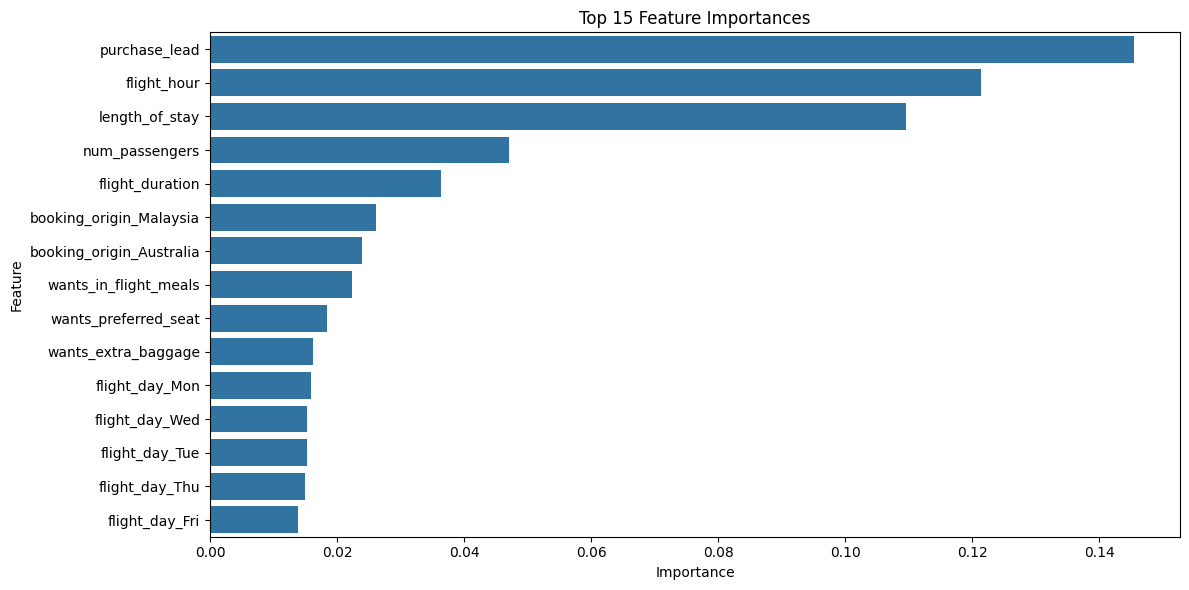

In [12]:
# Feature importance
rf = model.named_steps['classifier'] # Changed 'pipeline' to 'model' and 'model' to 'classifier'
ohe = model.named_steps['preprocessor'].named_transformers_['cat'] # Changed 'pipeline' to 'model' and 'preprocess' to 'preprocessor'
feature_names = numerical_features + list(ohe.get_feature_names_out(categorical_features)) # Changed 'numerical' to 'numerical_features' and 'categorical' to 'categorical_features'
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=np.array(feature_names)[indices][:15])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

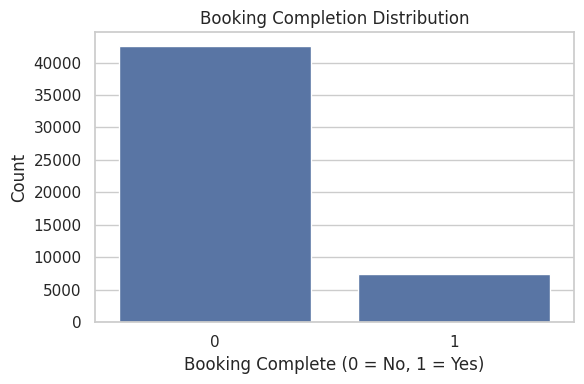

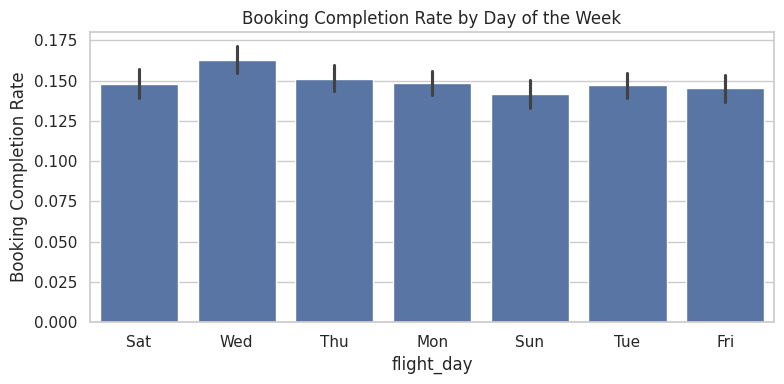

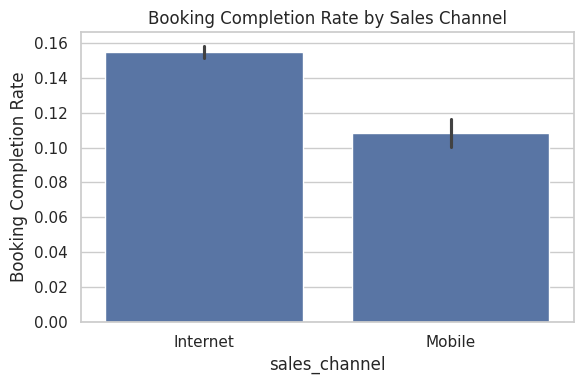

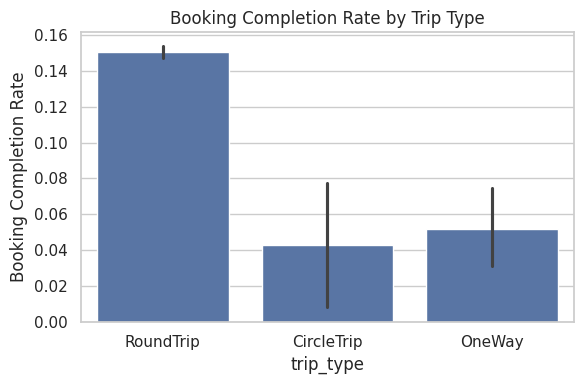

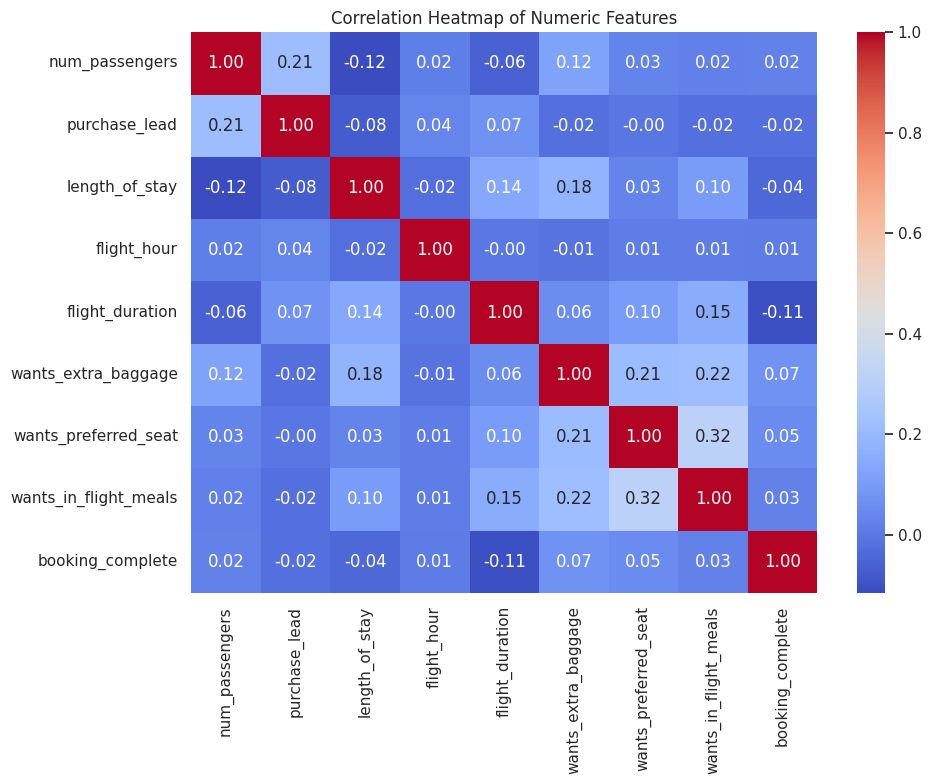

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual theme
sns.set(style="whitegrid")

# Plot 1: Booking completion rate
plt.figure(figsize=(6, 4))
sns.countplot(x='booking_complete', data=df)
plt.title("Booking Completion Distribution")
plt.xlabel("Booking Complete (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot 2: Booking rate by day of the week
plt.figure(figsize=(8, 4))
sns.barplot(x='flight_day', y='booking_complete', data=df)
plt.title("Booking Completion Rate by Day of the Week")
plt.ylabel("Booking Completion Rate")
plt.tight_layout()
plt.show()

# Plot 3: Booking rate by sales channel
plt.figure(figsize=(6, 4))
sns.barplot(x='sales_channel', y='booking_complete', data=df)
plt.title("Booking Completion Rate by Sales Channel")
plt.ylabel("Booking Completion Rate")
plt.tight_layout()
plt.show()

# Plot 4: Booking rate by trip type
plt.figure(figsize=(6, 4))
sns.barplot(x='trip_type', y='booking_complete', data=df)
plt.title("Booking Completion Rate by Trip Type")
plt.ylabel("Booking Completion Rate")
plt.tight_layout()
plt.show()

# Plot 5: Correlation heatmap for numeric features
numeric_df = df[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
                 'flight_duration', 'wants_extra_baggage', 'wants_preferred_seat',
                 'wants_in_flight_meals', 'booking_complete']]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()